# **Yellow Taxi Trip Statistical Analysis**

**The goal** of this second notebook is to characterize and clean the 2017 Yellow Taxi Trip data set and to create a visualization to share to stakeholders.

**Part 1:** Load the Data

- Create a pandas dataframe for data cleaning, statistical analysis, and visualization.

**Part 2:** Transform the Data

**Part 3:** Visualize the Data

**Part 4:** Arrange and Share the Data

## **1: Load the Data**

### **Build dataframe**

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns 

# Load data
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')


## **2: Transform the Data**

### **Convert data columns to datetime**

We have to convert the date columns to datetime in order to derive total trip duration.

In [2]:
# Convert data columns to datetime
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])


<span style="color: var(--vscode-foreground);"><b>We will use</b></span> _box plots to determine outliers and where the bulk of the data points reside in terms of `trip_distance`, `duration`, and `total_amount`_  
<span style="color: var(--vscode-foreground);"><b>We will use</b></span> _scatter plots to visualize the trends and patters and outliers of critical variables, such as `trip_distance` and `total_amount`_
<span style="color: var(--vscode-foreground);"><b>We will use</b></span> _bar charts to determine average number of trips per month, weekday, weekend, etc._

## **3: Slice and Visualize the Data**

### **Boxplots and Histograms**

We check for outliers on `trip_distance`, `total_amount` and `tip_amount` using box plots and histograms.

### **3a. trip\_distance**

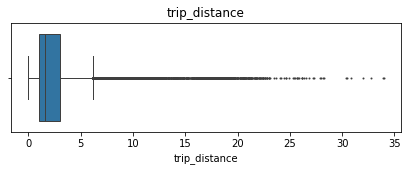

In [3]:
# Create box plot of trip_distance
plt.figure(figsize=(7,2))
plt.title('trip_distance')
sns.boxplot(data=None, x=df['trip_distance'], fliersize=1)

# save the plot as JPG file
plt.savefig("figs/trip_boxplot.jpg")


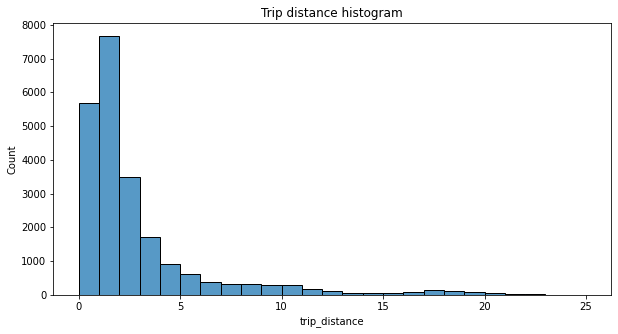

In [4]:
# Create histogram of trip_distance
plt.figure(figsize=(10,5))
sns.histplot(df['trip_distance'], bins=range(0,26,1))
plt.title('Trip distance histogram')

# save the plot as JPG file
plt.savefig("figs/trip_histogram.jpg")


**Observations:** The majority of trips were journeys of less than two miles. The number of trips falls away steeply as the distance traveled increases beyond two miles.

### **3b. total\_amount**

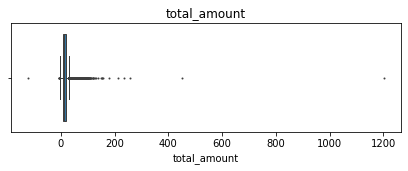

In [5]:
# Create box plot of total_amount
plt.figure(figsize=(7,2))
plt.title('total_amount')
sns.boxplot(x=df['total_amount'], fliersize=1)

# save the plot as JPG file
plt.savefig("figs/total_boxplot.jpg")


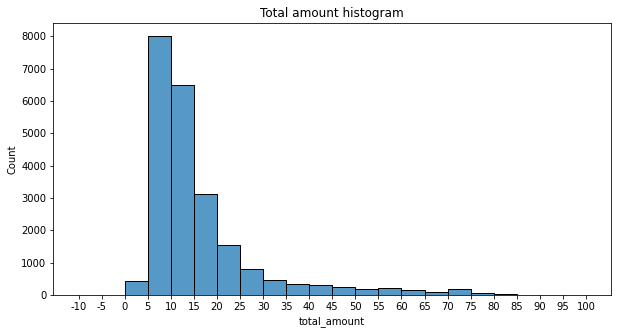

In [6]:
# Create histogram of total_amount
plt.figure(figsize=(10,5))
ax = sns.histplot(df['total_amount'], bins=range(-10,101,5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.title('Total amount histogram')

# save the plot as JPG file
plt.savefig("figs/totals_histogram.jpg")


**Observations:** The total cost of each trip also has a distribution that skews right, with most costs falling in the $5-15 range.

### **3c. tip\_amount**

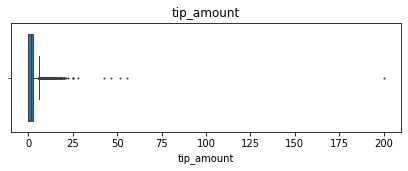

<Axes: title={'center': 'tip_amount'}, xlabel='tip_amount'>

In [7]:
# Create box plot of tip_amount
plt.figure(figsize=(7,2))
plt.title('tip_amount')
sns.boxplot(x=df['tip_amount'], fliersize=1)


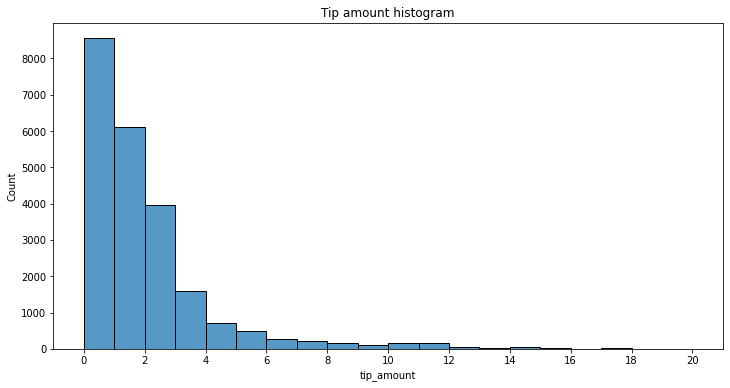

Text(0.5, 1.0, 'Tip amount histogram')

In [8]:
# Create histogram of tip_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['tip_amount'], bins=range(0,21,1))
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title('Tip amount histogram')


**Observations:** The distribution for tip amount is right-skewed, with nearly all the tips in the $0-3 range.

### **3d. tip\_amount by vendor**

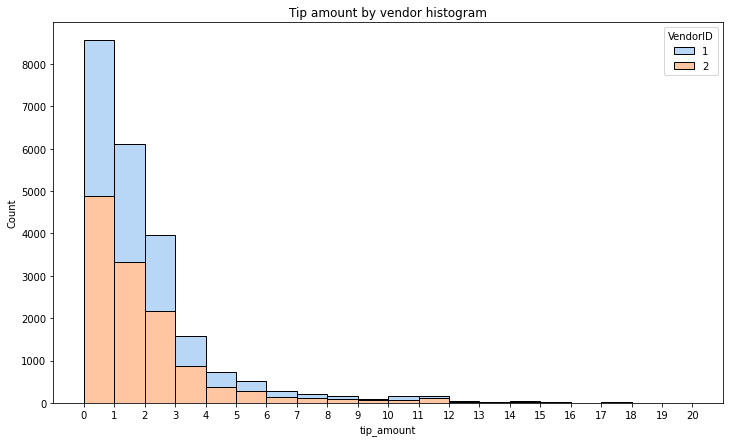

Text(0.5, 1.0, 'Tip amount by vendor histogram')

In [9]:
# Create histogram of tip_amount by vendor
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='tip_amount', bins=range(0,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram')


**Observations:** Separating the tip amount by vendor reveals that there are no noticeable aberrations in the distribution of tips between the two vendors in the dataset. Vendor two has a slightly higher share of the rides, and this proportion is approximately maintained for all tip amounts.

### Next, we zoom in on the upper end of the range of tips to check whether vendor one gets noticeably more of the most generous tips.

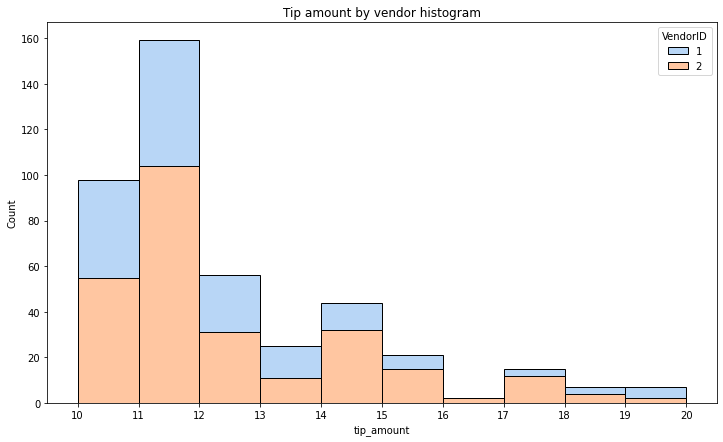

Text(0.5, 1.0, 'Tip amount by vendor histogram')

In [10]:
# Create histogram of tip_amount by vendor for tips > $10 
tips_over_ten = df[df['tip_amount'] > 10]
plt.figure(figsize=(12,7))
ax = sns.histplot(data=tips_over_ten, x='tip_amount', bins=range(10,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip amount by vendor histogram')


**Observations:** The proportions are maintained even at these higher tip amounts, with the exception being at highest extremity, but this is not noteworthy due to the low sample size at these tip amounts.

### **3e. Mean tips by passenger count**

We examine the unique values in the `passenger_count` column.

In [11]:
df['passenger_count'].value_counts()


passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

**Observations****:** Nearly two thirds of the rides were single occupancy, though there were still nearly 700 rides with as many as six passengers. Also, there are 33 rides with an occupancy count of zero, which doesn't make sense. These would likely need to be dropped unless a reasonable explanation can be found for them.

In [12]:
# Calculate mean tips by passenger_count
mean_tips_by_passenger_count = df.groupby(['passenger_count']).mean(numeric_only=True)[['tip_amount']]
mean_tips_by_passenger_count


,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


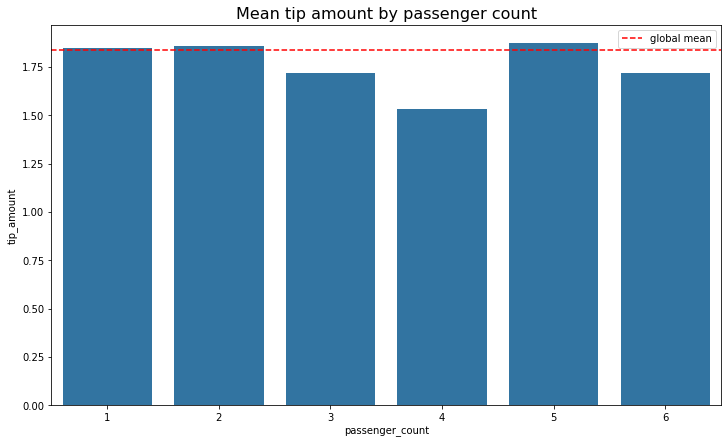

Text(0.5, 1.0, 'Mean tip amount by passenger count')

In [13]:
# Create bar plot for mean tips by passenger count
data = mean_tips_by_passenger_count.tail(-1)
rank = data['tip_amount'].argsort().argsort()
plt.figure(figsize=(12,7))
ax = sns.barplot(x=data.index,
            y=data['tip_amount'],
            )
ax.axhline(df['tip_amount'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title('Mean tip amount by passenger count', fontsize=16)


**Observations****:** Mean tip amount varies very little by passenger count. Although it does drop noticeably for four-passenger rides, it's expected that there would be a higher degree of fluctuation because rides with four passengers were the least plentiful in the dataset (aside from rides with zero passengers).

### **3f. Monthly and Weekly Stats**

In [14]:
# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()


**Plot total ride count by month**

Begin by calculating total ride count by month.

In [15]:
# Get total number of rides for each month
monthly_rides = df['month'].value_counts()
monthly_rides


month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

The months are out of order, so we need to <span style="color: var(--vscode-foreground);">put the months in calendar order.</span>

In [16]:
# Reorder the monthly ride list so months go in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides


month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

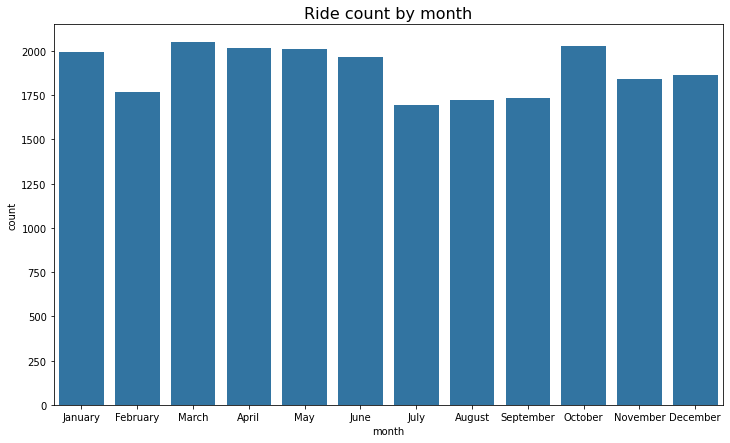

In [17]:
# Create a bar plot of total rides per month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides)
plt.title('Ride count by month', fontsize=16)

# save the plot as JPG file
plt.savefig("figs/rides_monthly.jpg")


**Observations:** Monthly rides are fairly consistent, with notable dips in the summer months of July, August, and September, and also in February.

### **3g. Daily Stats**

<span style="color: var(--vscode-foreground);">Repeat the above process, but now calculate the total rides by day of the week.</span>

In [18]:
# Repeat the above process, this time for rides by day
daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides


day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

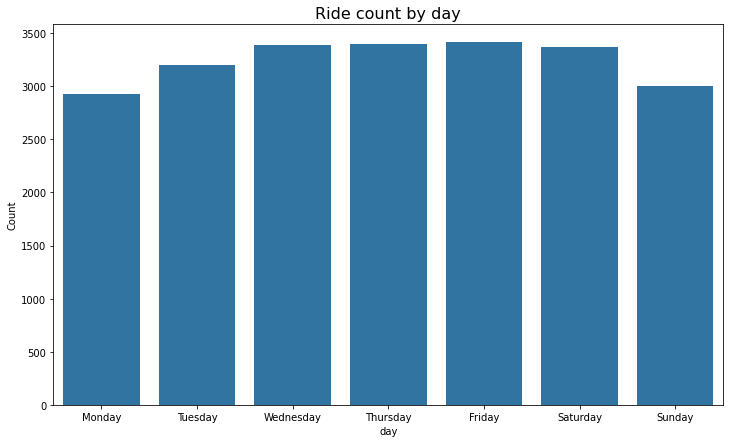

In [19]:
# Create bar plot for ride count by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x=daily_rides.index, y=daily_rides)
ax.set_ylabel('Count')
plt.title('Ride count by day', fontsize=16)

# save the plot as JPG file
plt.savefig("figs/rides_daily.jpg")


**Observations:** Suprisingly, Wednesday through Saturday had the highest number of daily rides, while Sunday and Monday had the least.

**Plot total revenue by day of the week**

Repeat the above process, but now calculate the total revenue by day of the week.

In [20]:
# Repeat the process, this time for total revenue by day
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_amount_day = df.groupby('day').sum(numeric_only=True)[['total_amount']]
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day


,total_amount
day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


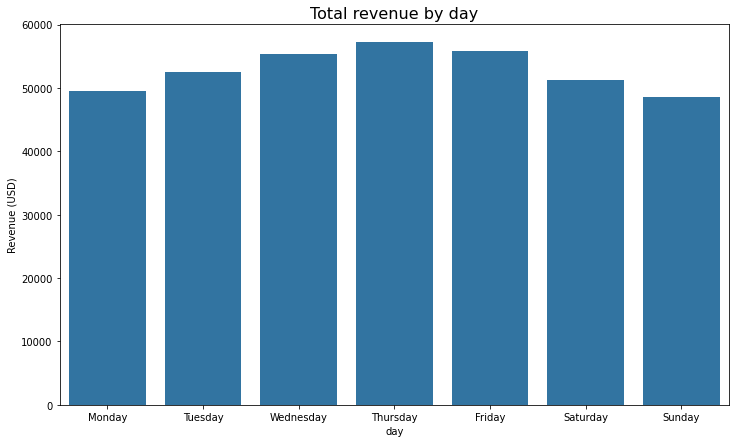

In [21]:
# Create bar plot of total revenue by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_day.index, y=total_amount_day['total_amount'])
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by day', fontsize=16)

# save the plot as JPG file
plt.savefig("figs/revenue_daily.jpg")


**Observations:** Thursday had the highest gross revenue of all days, and Sunday and Monday had the least. Interestingly, although Saturday had only 35 fewer rides than Thursday, its gross revenue was ~$6,000 less than Thursday's—more than a 10% drop.

**Plot total revenue by month**

In [22]:
# Repeat the process, this time for total revenue by month
total_amount_month = df.groupby('month').sum(numeric_only=True)[['total_amount']]
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


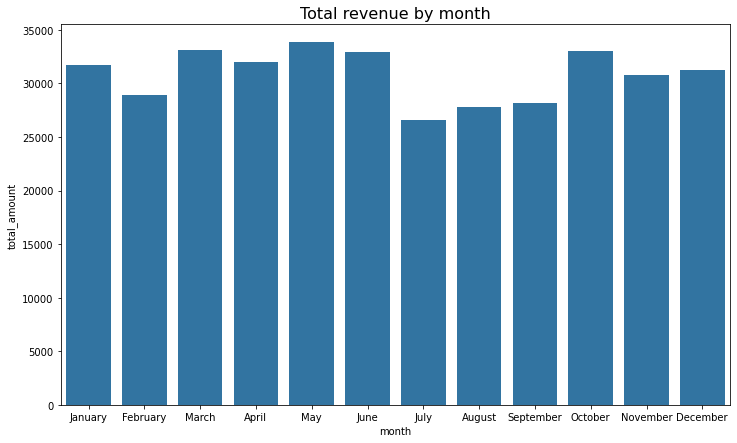

In [23]:
# Create a bar plot of total revenue by month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_month.index, y=total_amount_month['total_amount'])
plt.title('Total revenue by month', fontsize=16)

# save the plot as JPG file
plt.savefig("figs/revenue_monthly.jpg")


**Observations:** Monthly revenue generally follows the pattern of monthly rides, with noticeable dips in the summer months of July, August, and September, and also one in February.

**Plot mean trip distance by drop-off location**

In [24]:
# Get number of unique drop-off location IDs
df['DOLocationID'].nunique()


216

In [25]:
# Calculate the mean trip distance for each drop-off location
distance_by_dropoff = df.groupby('DOLocationID').mean(numeric_only=True)[['trip_distance']]

# Sort the results in descending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')
distance_by_dropoff 


,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


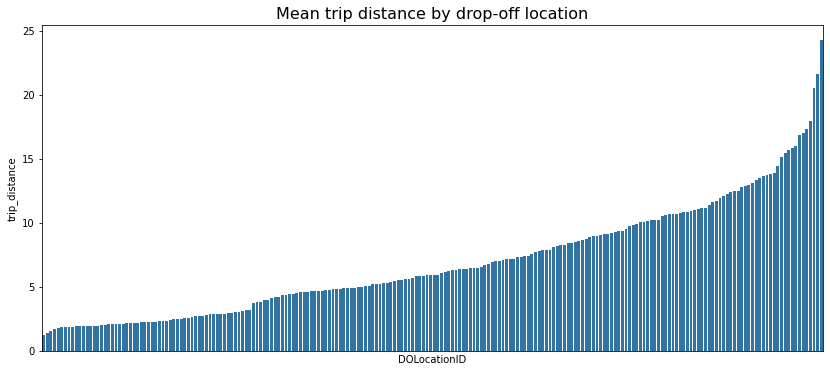

Text(0.5, 1.0, 'Mean trip distance by drop-off location')

In [26]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(14,6))
ax = sns.barplot(x=distance_by_dropoff.index, 
                 y=distance_by_dropoff['trip_distance'],
                 order=distance_by_dropoff.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=16)


**Observations:** This plot presents a characteristic curve related to the cumulative density function of a normal distribution. In other words, it indicates that the drop-off points are relatively evenly distributed over the terrain.

## **4: Present the Data**

### Google Slides presentation link [HERE](https://docs.google.com/presentation/d/1I3PJeAL6wSCZCT8FXa4GtsFjZeRMaZ67nGlbKEv-jzA/edit?usp=sharing).